## Visualization of One Election 
#### It performs MDS on the data and outputs the candidates and voters positions on a single axis 


In [1]:
import seaborn as sns

from scipy.stats import kurtosis, skew

from rcv_distribution import *
from rcv_dimensionality import *
from voting_rules import *

##### Assign csv to the path of the file you are wishing to analyse

c:\Users\mahsh\Documents\GitHub\bugs-in-democracy\EIL summer 2023\rcv_dimensionality.py:170: RuntimeWarning: divide by zero encountered in true_divide
  distance = 1 / np.sqrt(freq_upper_triangle)


Normalized distances: {'REP Poliquin, Bruce': 0.0, 'Hoar, William R.S.': 1.2668793481349654, 'Bond, Tiffany L.': 2.054072888510338, 'DEM Golden, Jared F.': 3.0}


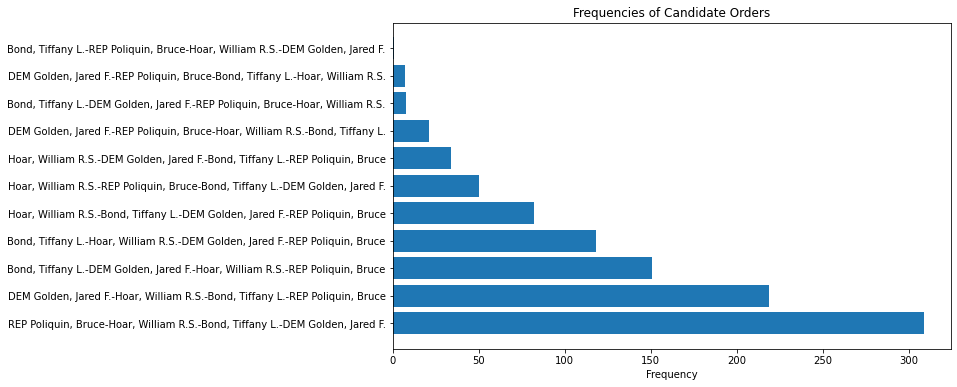

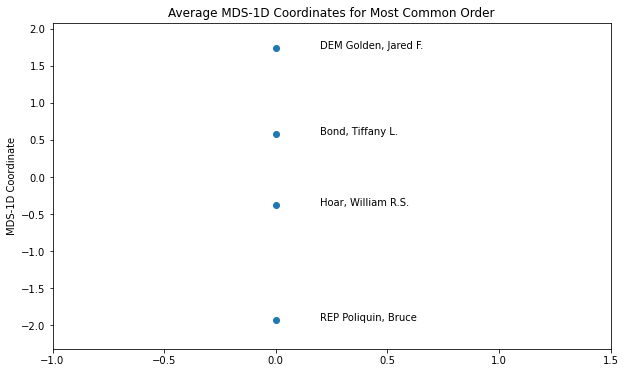

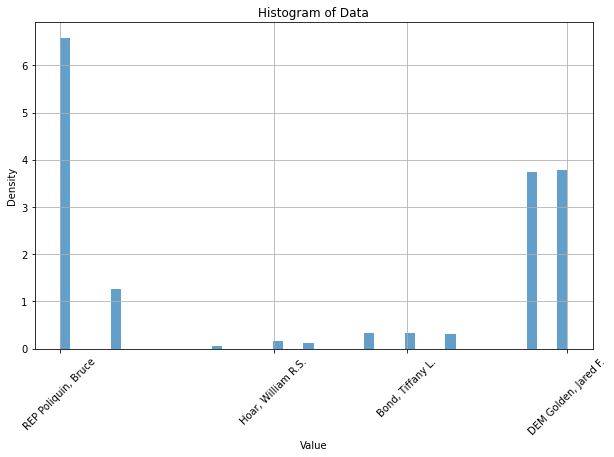

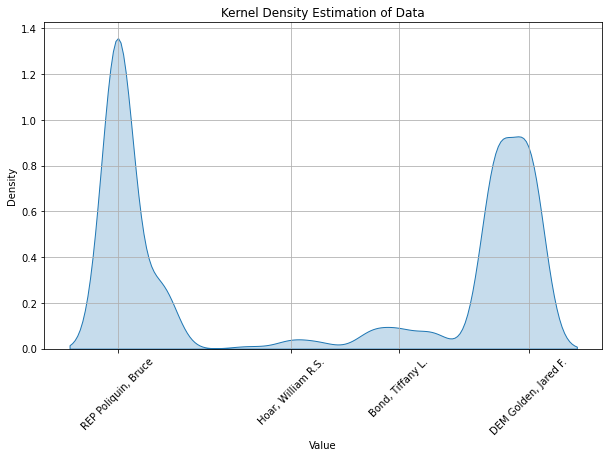

In [4]:
# Test the function with a custom CSV file
csv = "dataverse_files/Maine_11062018_CongressionalDistrict2.csv"

ballots, candidates = parse_election_data(csv)

# Perform the RCV analysis
test = perform_rcv_analysis(csv, n_runs=1000)
mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names = test

# Print the normalized distances between candidates and plot the MDS analysis
normalized_distances = get_distances_normalized(most_common_order, mds_1d_coordinates, candidate_names)
print("Normalized distances:", normalized_distances)
plot_rcv_analysis(mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names)

# Get the consistency points for the bimodality analysis
points = get_consistency_points(ballots, candidates, normalized_distances)

# Create a list of data points
data_points = []
for key, value in points.items():
    data_points.extend([key] * value)

# Convert to numpy array
data_points = np.array(data_points)

# Prepare data for histogram
data_list = [x for x, count in points.items() for _ in range(count)]

normalized_points = []
normalized_names = []
for name in normalized_distances:
    normalized_names.append(name)
    normalized_points.append(normalized_distances[name])

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data_list, bins=50, density=True, alpha=0.7)
plt.title('Histogram of Data')
plt.xticks(normalized_points, normalized_names, rotation=45)
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Plot kernal density estimation
plt.figure(figsize=(10, 6))
sns.kdeplot(data_list, fill=True)
plt.title('Kernel Density Estimation of Data')
plt.xticks(normalized_points, normalized_names, rotation=45)
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [5]:
print(ballots)

{('REP Poliquin, Bruce',): 89669, ('DEM Golden, Jared F.', 'Bond, Tiffany L.'): 10505, ('REP Poliquin, Bruce', 'DEM Golden, Jared F.', 'Bond, Tiffany L.', 'Hoar, William R.S.'): 3467, ('Hoar, William R.S.', 'REP Poliquin, Bruce', 'Bond, Tiffany L.', 'DEM Golden, Jared F.'): 306, (): 5928, ('DEM Golden, Jared F.', 'Bond, Tiffany L.', 'Hoar, William R.S.', 'REP Poliquin, Bruce'): 23140, ('REP Poliquin, Bruce', 'Hoar, William R.S.', 'Bond, Tiffany L.', 'DEM Golden, Jared F.'): 11600, ('Hoar, William R.S.', 'Bond, Tiffany L.', 'REP Poliquin, Bruce', 'DEM Golden, Jared F.'): 579, ('DEM Golden, Jared F.',): 51673, ('Hoar, William R.S.', 'REP Poliquin, Bruce', 'DEM Golden, Jared F.', 'Bond, Tiffany L.'): 200, ('DEM Golden, Jared F.', 'Hoar, William R.S.', 'REP Poliquin, Bruce'): 605, ('DEM Golden, Jared F.', 'Bond, Tiffany L.', 'Hoar, William R.S.'): 17464, ('Bond, Tiffany L.', 'DEM Golden, Jared F.', 'Hoar, William R.S.'): 948, ('REP Poliquin, Bruce', 'Hoar, William R.S.'): 2801, ('Bond, Tif

#### run this cell to see the bimodality and gamma indices

In [5]:
#ballots, candidates = parse_election_data(csv)

# Calculate skewness and kurtosis
g = skew(data_points)
k = kurtosis(data_points)

# Calculate bimodality coefficient
n = len(data_points)
bimodality = (g**2 + 1) / (k + 3 * (n-1)**2 / ((n-2) * (n-3)))
print("Bimodality coefficient:", bimodality)
print("Gamma coefficiet:", get_gamma(normalized_distances, ballots))



Bimodality coefficient: 0.888251375908248
from gamma:  {('Golden, Jared Forrest',): 54734, ('Golden, Jared Forrest', 'Bond, Tiffany', 'Poliquin, Bruce'): 36058, ('Poliquin, Bruce',): 98263, ('Golden, Jared Forrest', 'Bond, Tiffany'): 53643, ('Bond, Tiffany', 'Golden, Jared Forrest', 'Poliquin, Bruce'): 6541, ('Golden, Jared Forrest', 'Poliquin, Bruce'): 3140, ('Poliquin, Bruce', 'Golden, Jared Forrest', 'Bond, Tiffany'): 8581, ('Poliquin, Bruce', 'Bond, Tiffany', 'Golden, Jared Forrest'): 20180, ('Poliquin, Bruce', 'Bond, Tiffany'): 11416, ('Golden, Jared Forrest', 'Poliquin, Bruce', 'Bond, Tiffany'): 5821, (): 5734, ('Bond, Tiffany',): 4989, ('Bond, Tiffany', 'Golden, Jared Forrest'): 5527, ('Poliquin, Bruce', 'Golden, Jared Forrest'): 3261, ('Bond, Tiffany', 'Poliquin, Bruce', 'Golden, Jared Forrest'): 3530, ('Bond, Tiffany', 'Poliquin, Bruce'): 1360}
Gamma coefficiet: 0.9343845018357073


#### winner under different RCV methods 

In [6]:
df = pd.DataFrame(ballots.keys(), ballots.values())
print(df)
df.to_csv("ballots.csv")

                           0                      1                      2
54734  Golden, Jared Forrest                   None                   None
36058  Golden, Jared Forrest          Bond, Tiffany        Poliquin, Bruce
98263        Poliquin, Bruce                   None                   None
53643  Golden, Jared Forrest          Bond, Tiffany                   None
6541           Bond, Tiffany  Golden, Jared Forrest        Poliquin, Bruce
3140   Golden, Jared Forrest        Poliquin, Bruce                   None
8581         Poliquin, Bruce  Golden, Jared Forrest          Bond, Tiffany
20180        Poliquin, Bruce          Bond, Tiffany  Golden, Jared Forrest
11416        Poliquin, Bruce          Bond, Tiffany                   None
5821   Golden, Jared Forrest        Poliquin, Bruce          Bond, Tiffany
5734                    None                   None                   None
4989           Bond, Tiffany                   None                   None
5527           Bond, Tiff

In [7]:

election = voting_rules(ballots, candidates)
print("IRV: ", election.irv())
print("Condorcet: ", election.condorcet())
print("Black: ", election.black())
print("Borda: ", election.borda())
print("Bucklin: ", election.bucklin())
print("Ranked Pairs: ", election.ranked_pairs())
print("Copeland: ", election.copeland())
print("mini_max: ", election.mini_max())
print("Plurality: ", election.plurality())
print("Majority: ", election.majority())
print("Approval: ", election.approval())

IRV:  Golden, Jared Forrest
Condorcet:  Golden, Jared Forrest
Black:  Golden, Jared Forrest
Borda:  Golden, Jared Forrest
Bucklin:  Golden, Jared Forrest
Ranked Pairs:  Golden, Jared Forrest
Copeland:  Golden, Jared Forrest
mini_max:  Golden, Jared Forrest
Plurality:  Golden, Jared Forrest
Majority:  -1
Approval:  Golden, Jared Forrest
